In [25]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('honeyproduction.csv')
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
data.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [4]:
data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [5]:
data.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(626, 8)

In [8]:
# 1.To explore quantitative variables and qualitative variables in the data set.
data.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [10]:
# From above we can clearly see that state is the only qualitative data , year is a categorical data so we will convert it 
# to numerical data and the rest is all quantitative data.

In [9]:
data["state"]

0      AL
1      AZ
2      AR
3      CA
4      CO
       ..
621    VA
622    WA
623    WV
624    WI
625    WY
Name: state, Length: 626, dtype: object

In [59]:
data['numcol']

0       16000.0
1       55000.0
2       53000.0
3      450000.0
4       27000.0
         ...   
621      4000.0
622     62000.0
623      6000.0
624     60000.0
625     50000.0
Name: numcol, Length: 626, dtype: float64

In [11]:
data.year = data.year.astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   state        626 non-null    object  
 1   numcol       626 non-null    float64 
 2   yieldpercol  626 non-null    int64   
 3   totalprod    626 non-null    float64 
 4   stocks       626 non-null    float64 
 5   priceperlb   626 non-null    float64 
 6   prodvalue    626 non-null    float64 
 7   year         626 non-null    category
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 35.6+ KB


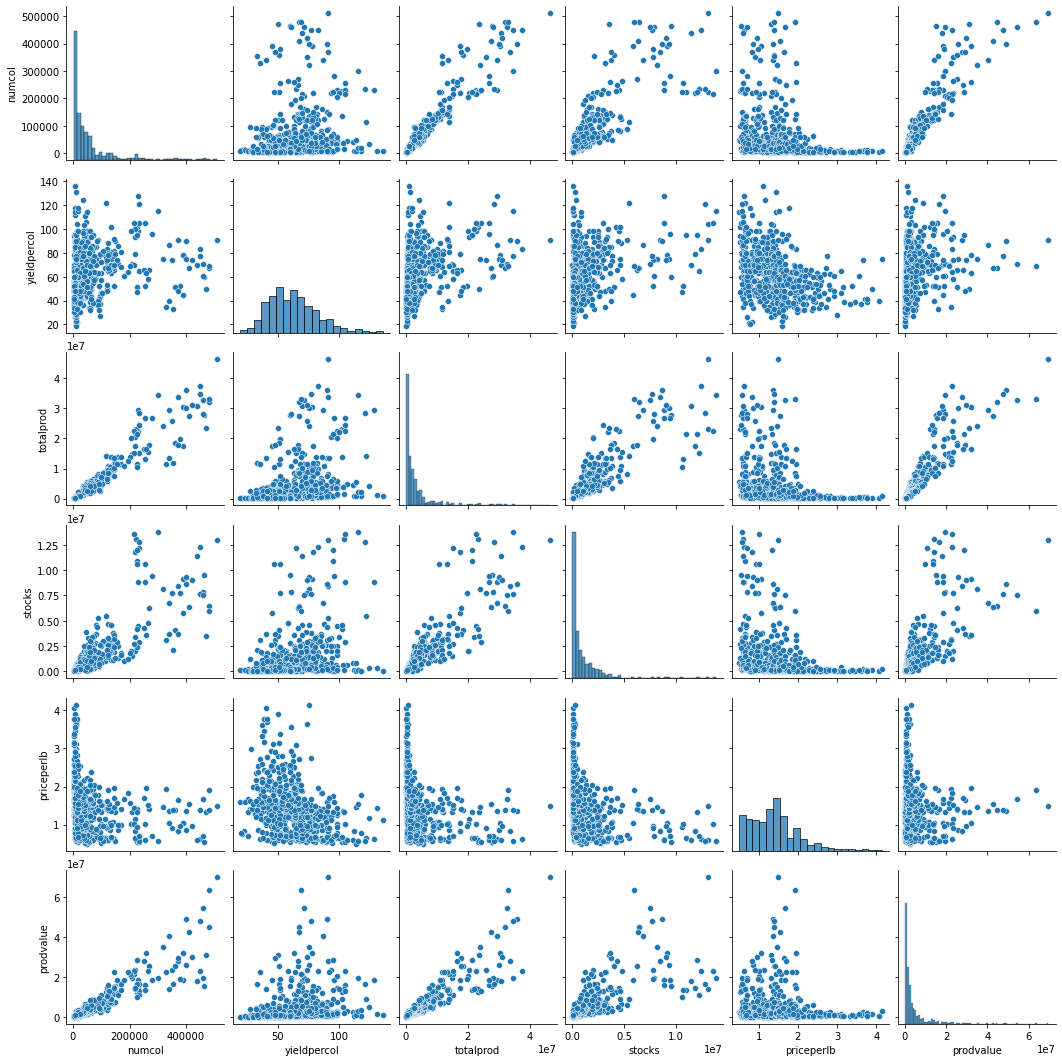

In [13]:
# 2.To find the relationship between numerical variables using pair plots and corelation plots.
sns.pairplot(data);

In [16]:
correlation_matrix=data.corr()
correlation_matrix['totalprod']

numcol         0.953594
yieldpercol    0.396252
totalprod      1.000000
stocks         0.878830
priceperlb    -0.264499
prodvalue      0.907236
Name: totalprod, dtype: float64

In [18]:
correlation=data.corr().round(2)
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.00,0.24,0.95,0.83,-0.23,0.91
yieldpercol,0.24,1.00,0.40,0.37,-0.36,0.28
totalprod,0.95,0.40,1.00,0.88,-0.26,0.91
stocks,0.83,0.37,0.88,1.00,-0.31,0.73
priceperlb,-0.23,-0.36,-0.26,-0.31,1.00,-0.09
prodvalue,0.91,0.28,0.91,0.73,-0.09,1.00


Text(0.5, 1.0, 'Relation between numerical variables')

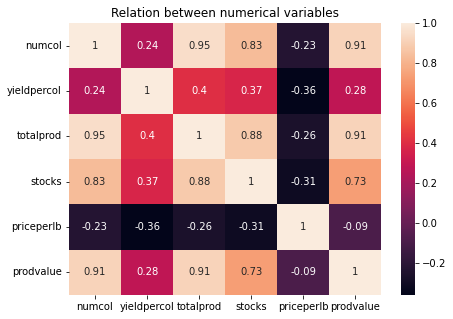

In [28]:
plt.figure(figsize=(7,5))
plot=sns.heatmap(correlation.round(2),annot=True)
plot.set_title("Relation between numerical variables")

In [29]:
#       OBSERVATIONS
# From above we can clearly infer that 
# 1)Number of colonies has a high positive correlation with total production, stocks and production value.
# 2)Price per lb has a high negative correlation with number of colonies, stock, yield per colony and total production 
#   value.

In [30]:
#        CONCLUSION
# Increase in number of colonies will increase production value which leads to an increase in stocks and total production.

In [31]:
# 3. Explore the overall trend of honey production in the US over the years.
"US" in data["state"]

False

<AxesSubplot:xlabel='totalprod', ylabel='prodvalue'>

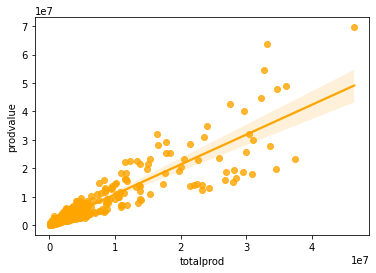

In [35]:
# 4. To observe the pattern of total honey production ans value of production every year.
sns.regplot(x=data["totalprod"], y=data["prodvalue"],color="orange")

In [ ]:
# OBSERVATIONS:Most of the values of total production and production value lies in th range of 0 to 1 as most of the dots
# are accumulated in that region.

# CONCLUSION: Above plot shows that total production decreases with increase in production value ie they are inversely 
#related.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

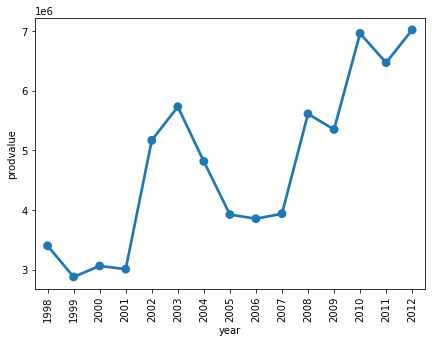

In [47]:
plt.figure(figsize=(7,5))
sns.pointplot(x='year',y='prodvalue',data=data,ci=None)
plt.xticks(rotation=90)

In [42]:
#            OBSERVATIONS
# Above graph shows that maximum production value was obtained in the year 2012.
# We can also refer that in 2003 production value increased from 1998 but then decreased till 2007.
# But after that it increased till 2012 and in 2012, highest value of production was noted.

In [ ]:
# Conclusion: Production value had increased from 1998 to 2012.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

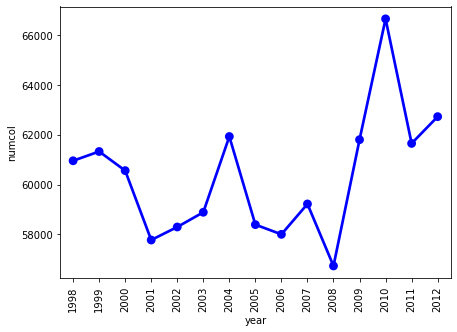

In [48]:
# 5. Variation in number of colonies over the year
plt.figure(figsize=(7,5))
sns.pointplot(x='year',y='numcol',data=data,color='blue',ci=None)
plt.xticks(rotation=90)

In [ ]:
#             OBSERVATIONS
# 1) Maximum number of colonies were obtained in 2010.
# 2) Minimum number of colonies were obtained in 2008.

In [ ]:
# Conclusion: Number of colonies had decreased from 1998 to 2012.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

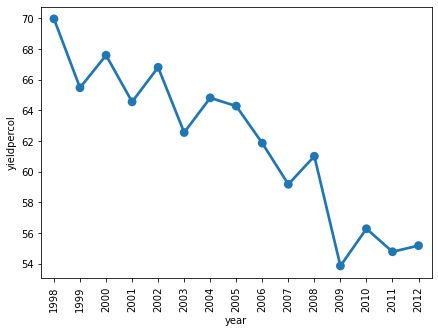

In [50]:
# 6. Analyse the the variation of yield per colony over the years and the production trends at state level.
plt.figure(figsize=(7,5))
sns.pointplot(x='year',y='yieldpercol',data=data,ci=None)
plt.xticks(rotation=90)

In [ ]:
#        OBSERVATIONS
# 1)Maximum yield per colony was obtained in 1998 with a value of 70.
# 2)Minimum yield per colony was obtained in 2009 with a value lower than 54.

In [ ]:
# CONCLUSION: Yield per colony had decreased from 1998 to 2012.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

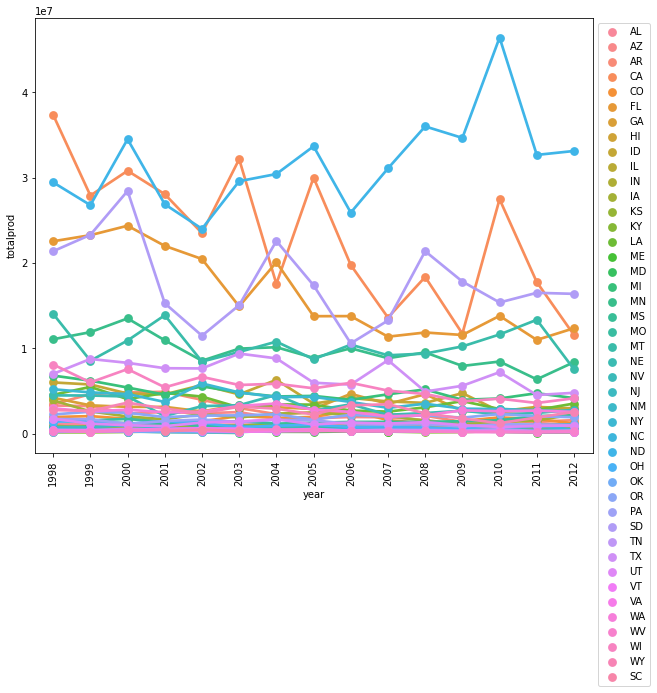

In [54]:
plt.figure(figsize=(10,8))
sns.pointplot(x='year',y='totalprod',data=data,ci=None,hue='state')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)

In [ ]:
#     OBSERVATIONS
#  States with blue colour ie NY,ND,OH etc have maximum total production.

In [ ]:
# CONCLUSION: States with blue colour had maximum total production in 2010 with a value greater than 4 

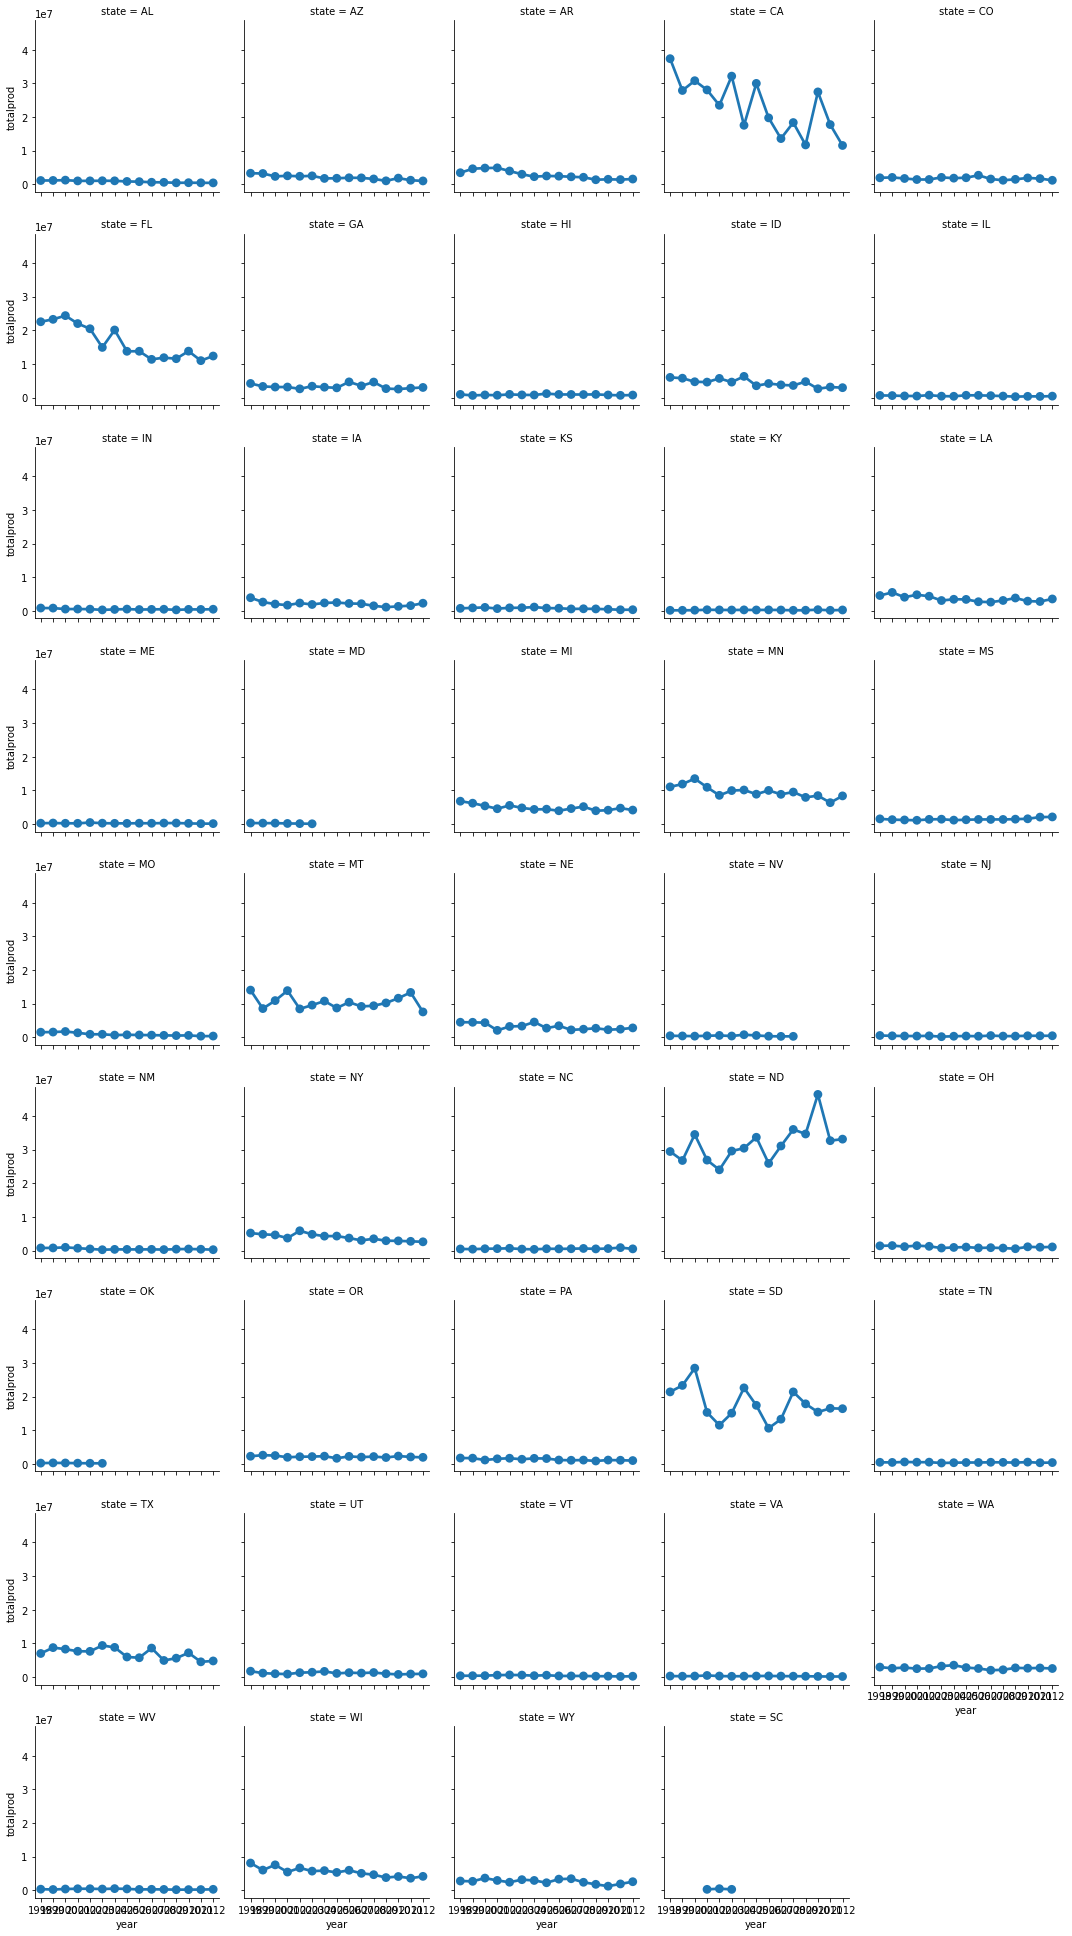

In [64]:
sns.catplot(x='year', y='totalprod', data=data , col='state' , kind="point" , height=3 , col_wrap=5)

In [ ]:
#    OBSERVATIONS
#  1) ND state has the maximum total production value.
#  2) CA,FL,MN,MT,SD,TX also produce large amount of total production value

In [ ]:
# CONCLUSION: ND state has the maximum total production value.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

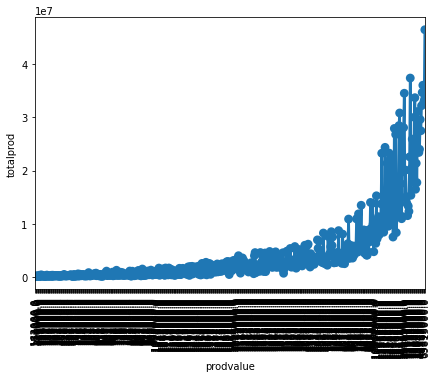

In [69]:
# 7. Effect of declining production trend had on the value of production.
plt.figure(figsize=(7,5))
sns.pointplot(x='prodvalue',y='totalprod',data=data,ci=None)
plt.xticks(rotation=90)

In [ ]:
# OBSERVATION: Total production value and production value are directly proportional to each other.

# CONCLUSION: Total production value is decreasing with decrease in production value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012')])

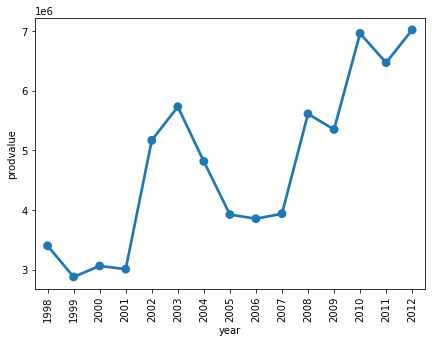

In [58]:
plt.figure(figsize=(7,5))
sns.pointplot(x='year',y='prodvalue',data=data,ci=None)
plt.xticks(rotation=90)

In [ ]:
#         OBSERVATIONS
# 1)Maximum total production value is greater than 7 in 2012 and 2010 followed by 2003 and 2008. 
# 2)Minimum total production value is less than 3 in 1999 followed by 2001 and 2000.

In [ ]:
# CONCLUSION: Production value has increased from 1998 to 2012.

<AxesSubplot:xlabel='prodvalue', ylabel='year'>

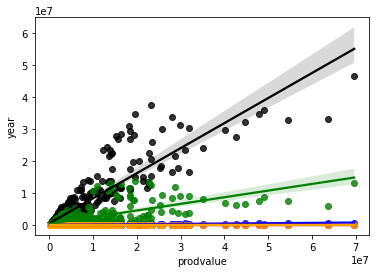

In [65]:
sns.regplot(x=data["prodvalue"], y=data["numcol"],color="blue")
sns.regplot(x=data["prodvalue"], y=data["yieldpercol"],color="red")
sns.regplot(x=data["prodvalue"], y=data["totalprod"],color="black")
sns.regplot(x=data["prodvalue"], y=data["priceperlb"],color="purple")
sns.regplot(x=data["prodvalue"], y=data["stocks"],color="green")
sns.regplot(x=data["prodvalue"], y=data["year"],color="orange")

In [ ]:
# OBSERVATIONS: Above plot shows that prod value is decreasing as years are increased.

# CONCLUSION: Total production is the cause for its declining followed by stocks.

<AxesSubplot:xlabel='prodvalue', ylabel='totalprod'>

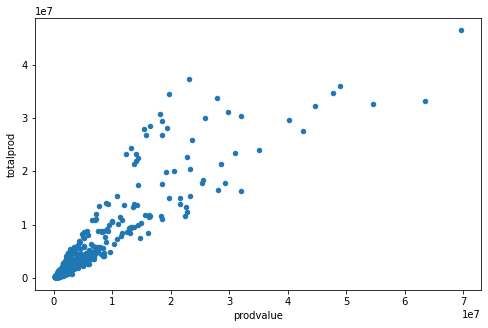

In [67]:
data.plot(kind="scatter",x="prodvalue",y="totalprod",figsize=(8,5))

In [ ]:
# OBSERVATION: Total production value and production value are directly proportional to each other.

# CONCLUSION: Total production value is decreasing with decrease in production value.